# Q1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\4\delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#visualization and EDA

In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


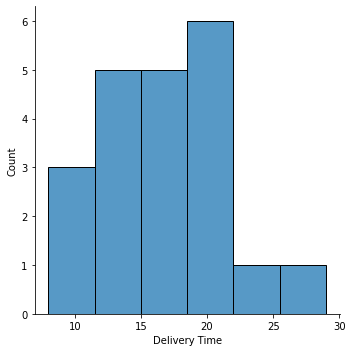

In [7]:
sns.displot(df['Delivery Time'])

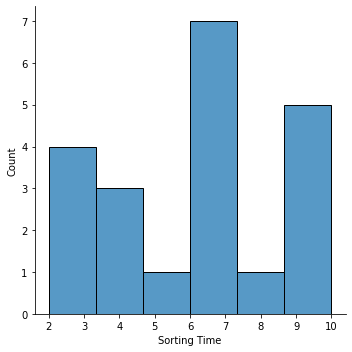

In [8]:
sns.displot(df['Sorting Time'])

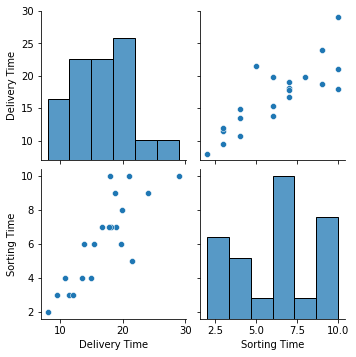

In [9]:
sns.pairplot(df)

In [10]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
y=df['Delivery Time']
x=df['Sorting Time']

## Model Building

### Model 1

In [39]:
import statsmodels.api as sm
model1=sm.OLS(y,x).fit()
predict=model1.predict(x)

In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    6.12e-15
Time:                        17:53:15   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model1.predict(df['Sorting Time'])

0     25.652463
1     10.260985
2     15.391478
3     23.087216
4     25.652463
5     15.391478
6     17.956724
7      7.695739
8     25.652463
9     23.087216
10    20.521970
11    10.260985
12    17.956724
13     7.695739
14     7.695739
15    10.260985
16    15.391478
17    17.956724
18     5.130493
19    17.956724
20    12.826231
dtype: float64

In [17]:
# Data Transformation

### Model 2 - Log Transformation of x

In [18]:
x_log=np.log(x)

In [19]:
model2=sm.OLS(y,x_log).fit()
predict2=model2.predict(x_log)

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    1.48e-17
Time:                        17:42:04   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3 - Log Transformation of y

In [25]:
y_log=np.log(y)

In [27]:
model3=sm.OLS(y_log,x).fit()
predict3=model3.predict(x)

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    3.00e-12
Time:                        17:44:08   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model4 - Log Transformation of X & Y

In [29]:
model4=sm.OLS(y_log,x_log).fit()
predict4=model4.predict(x_log)

In [30]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    5.72e-17
Time:                        17:45:14   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model5 - Sq Root Transformation of X

In [31]:
x_sqrt=np.sqrt(x)

In [33]:
model5=sm.OLS(y,x_sqrt).fit()
predict5=model5.predict(x_sqrt)

In [36]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    1.88e-17
Time:                        17:50:17   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model6 - Sq Root Transformation of Y

In [32]:
y_sqrt=np.sqrt(y)

In [34]:
model6=sm.OLS(y_sqrt,x).fit()
predict6=model6.predict(x)

In [37]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    5.09e-13
Time:                        17:50:31   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model7 - Square Root Transformation of X & Y

In [35]:
model7=sm.OLS(y_sqrt,x_sqrt).fit()
predict6=model6.predict(x_sqrt)

In [38]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                    2.10e-20
Time:                        17:50:56   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
l=[model1, model2, model3, model4, model5, model6, model7]
n=['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7']
r=list(i.rsquared for i in l)

In [118]:
d={"Model" : n , "Rsquared": r}
models=pd.DataFrame(d)

In [123]:
models

,Model,Rsquared
0,model1,0.955005
1,model2,0.916549
2,model3,0.916549
3,model4,0.971780
4,model5,0.974747
5,model6,0.930066
6,model7,0.987195
